# What is the most optimal skill to learn for Data Analysts?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vlad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US_for_DA = df[df['job_country'] == 'United States'][df['job_title_short'] == 'Data Analyst'].dropna(subset=['salary_year_avg']).copy()
DA_count = len(df_US_for_DA)
df_US_for_DA_exploded = df_US_for_DA.explode('job_skills')
top_skills = df_US_for_DA_exploded['job_skills'].value_counts().index.tolist()[:10]
pivot = pivot_table = df_US_for_DA_exploded.pivot_table(index='job_skills', values= 'salary_year_avg', aggfunc=['median', 'count']).reset_index()
pivot_table.columns = ['job_skills', 'median_salary', 'skill_count']
pivot_table = pivot_table.sort_values(by='skill_count', ascending=False)
pivot_table['skill_percentage'] = ((pivot_table['skill_count'] / DA_count) * 100).round(2)


C:\Users\vlad\AppData\Local\Temp\ipykernel_35700\3383351004.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_US_for_DA = df[df['job_country'] == 'United States'][df['job_title_short'] == 'Data Analyst'].dropna(subset=['salary_year_avg']).copy()


In [ ]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')
pivot_table_with_tech = pd.merge(pivot_table, df_technology, left_on='job_skills', right_on='skills')
pivot_table_with_tech = pivot_table_with_tech.drop(columns=['skills'])
pivot_table_with_tech = pivot_table_with_tech.head(10)
pivot_table_with_tech

,job_skills,median_salary,skill_count,skill_percentage,technology
0,sql,91000.00,2508,57.66,programming
1,excel,84392.00,1808,41.56,analyst_tools
2,python,97500.00,1431,32.90,programming
3,tableau,92875.00,1364,31.36,analyst_tools
4,sas,90000.00,926,21.29,analyst_tools
5,sas,90000.00,926,21.29,programming
6,r,92500.00,893,20.53,programming
7,power bi,90000.00,838,19.26,analyst_tools
8,powerpoint,85000.00,462,10.62,analyst_tools
9,word,81194.75,461,10.60,analyst_tools


4 [-0.32593723 -0.21285566]
5 [ 0.85161428 -0.70879788]


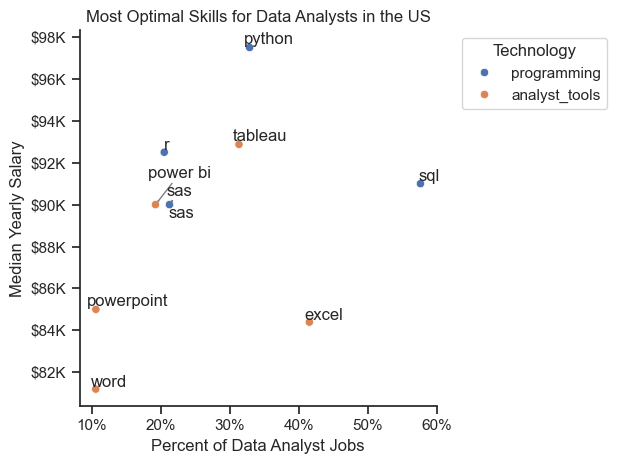

In [7]:
from adjustText import adjust_text

sns.scatterplot(
    data=pivot_table_with_tech,
    x='skill_percentage',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = [
    plt.text(x, y, label)
    for x, y, label in zip(
        pivot_table_with_tech['skill_percentage'],
        pivot_table_with_tech['median_salary'],
        pivot_table_with_tech['job_skills']
    )
]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()